In [1]:
import pandas as pd
import numpy as np
import scipy

from pandas_datareader import data, wb

import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from pandas.tseries.offsets import *

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [41]:
strategyname = 'strategy_310319'
d, info = matlab.loaddata('../../mat/'+strategyname+'.mat')

df = pd.DataFrame()
df['close'] = d.exo
#df['vol'] = d.volume

In [9]:
bb_period = 20
bb_k = 2
df['bb_central_line'] = df.close.rolling(bb_period).mean()
df['bb_upperband'] = df.bb_central_line + (bb_k * df.bb_central_line.rolling(bb_period).std())
df['bb_lowerband'] = df.bb_central_line - (bb_k * df.bb_central_line.rolling(bb_period).std())

#df['bb_%b'] = (df.close - df['bb_lowerband']) / (df['bb_upperband'] - df['bb_lowerband'])
#df['bb_width'] = (df['bb_upperband'] - df['bb_lowerband'])

In [42]:
for i in range(10,100,10):
    
    for k in range(10):

        bb_period = i
        bb_k = k
        df['bb_central_line'+str(i)+'_'+str(k)] = df.close.rolling(bb_period).mean()
        df['bb_upperband'+str(i)+'_'+str(k)] = df['bb_central_line'+str(i)+'_'+str(k)] + (bb_k * df['bb_central_line'+str(i)+'_'+str(k)].rolling(bb_period).std())
        df['bb_lowerband'+str(i)+'_'+str(k)] = df['bb_central_line'+str(i)+'_'+str(k)] - (bb_k * df['bb_central_line'+str(i)+'_'+str(k)].rolling(bb_period).std())

        #df['bb_%b'] = (df.close - df['bb_lowerband']) / (df['bb_upperband'] - df['bb_lowerband'])
        df['bb_width'+str(i)+'_'+str(k)] = (df['bb_upperband'+str(i)+'_'+str(k)] - df['bb_lowerband'+str(i)+'_'+str(k)])

In [ ]:
for i in range(10,100,10):

    bb_period = i
    bb_k = 2
    df['bb_central_line'+str(i)] = df.close.rolling(bb_period).mean()
    df['bb_upperband'+str(i)] = df['bb_central_line'+str(i)] + (bb_k * df['bb_central_line'+str(i)].rolling(bb_period).std())
    df['bb_lowerband'+str(i)] = df['bb_central_line'+str(i)] - (bb_k * df['bb_central_line'+str(i)].rolling(bb_period).std())

    df['bb_%b'] = (df.close - df['bb_lowerband']) / (df['bb_upperband'] - df['bb_lowerband'])
    df['bb_width'+str(i)] = (df['bb_upperband'+str(i)] - df['bb_lowerband'+str(i)])

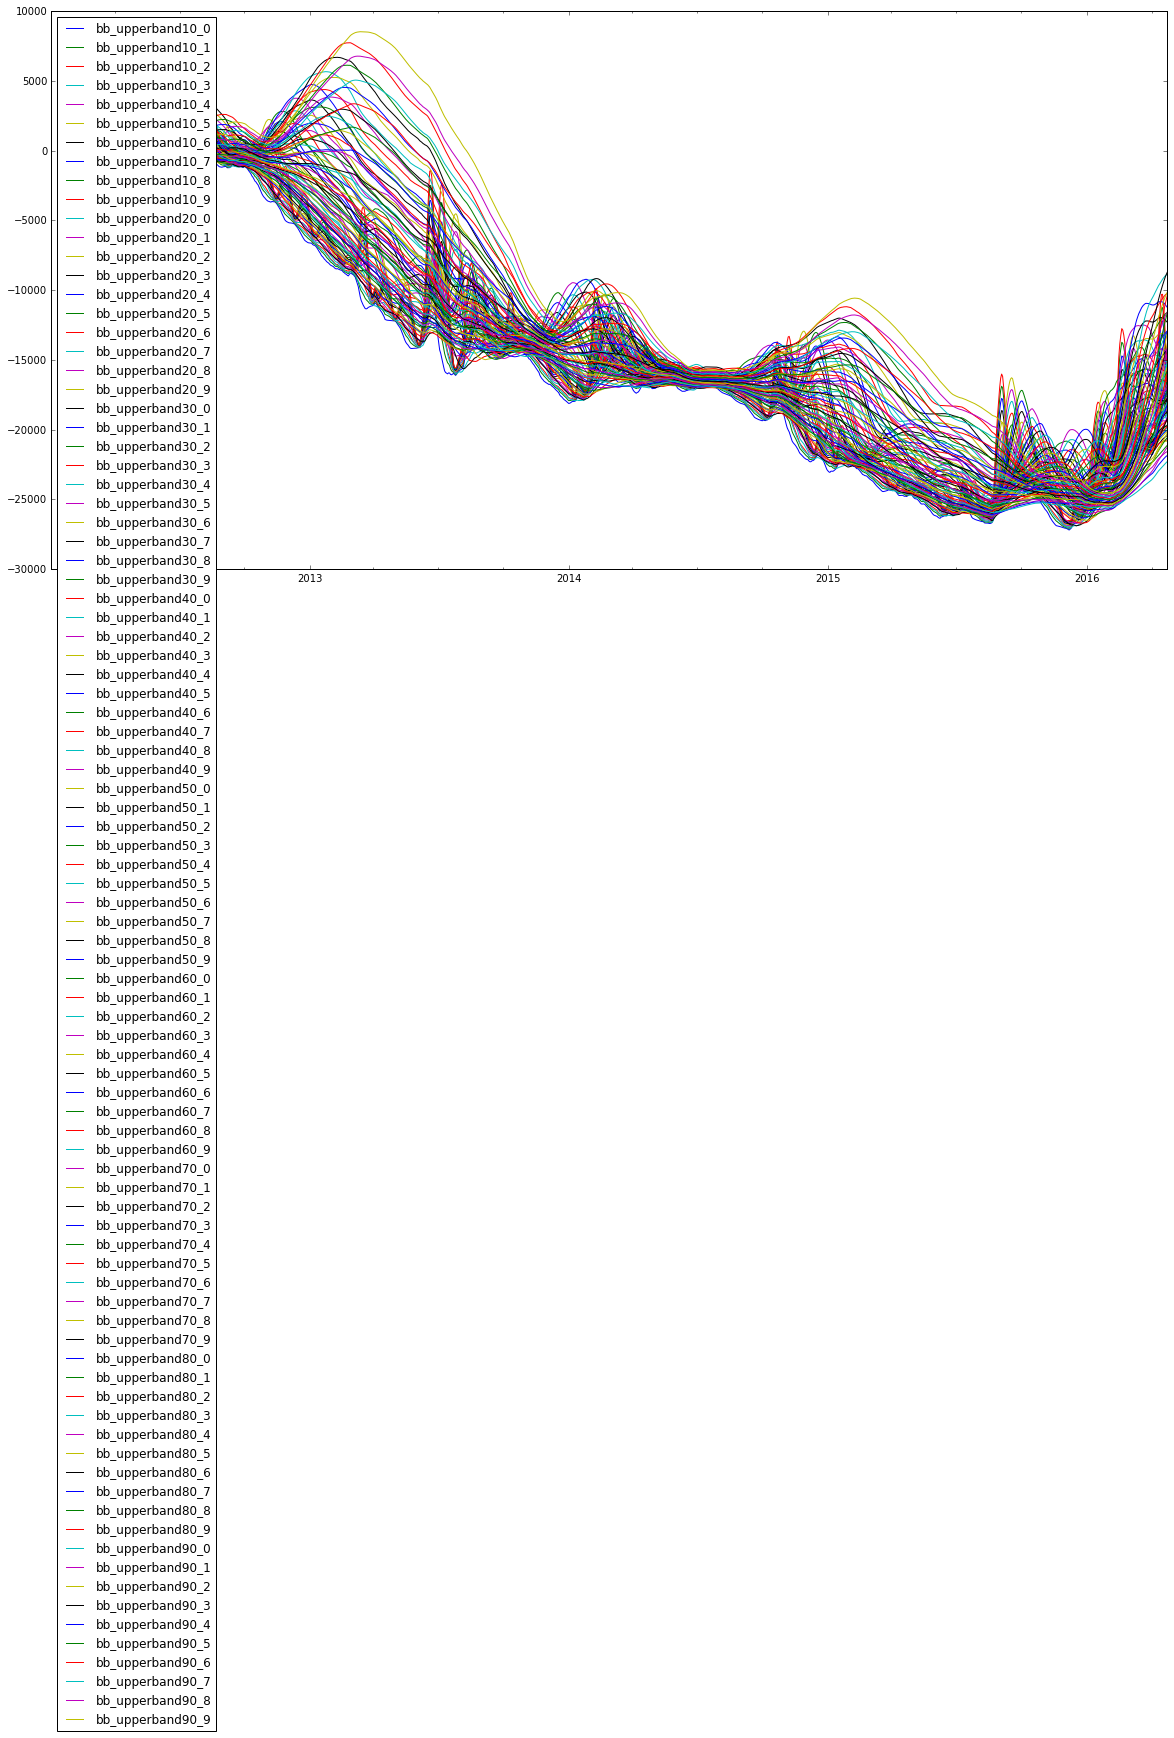

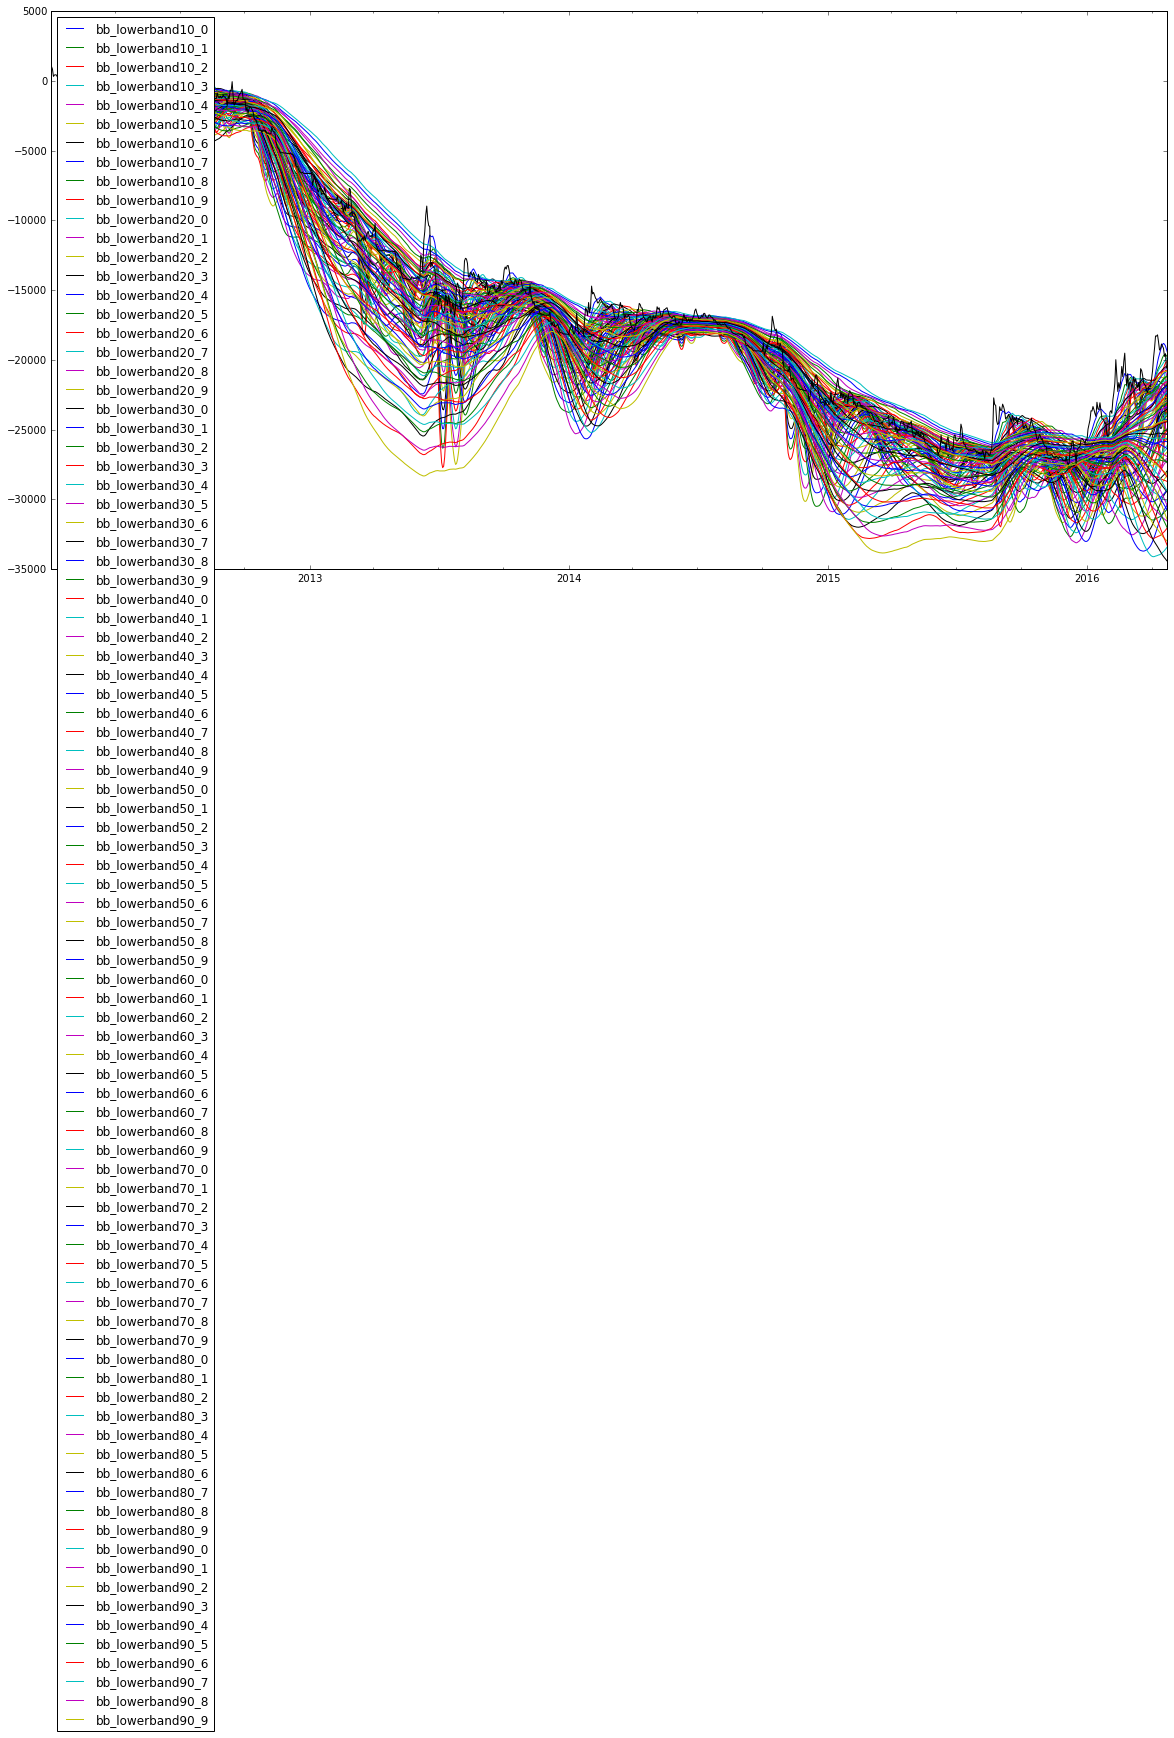

In [44]:
df.filter(like='upper').mean(axis=1).plot()
df.filter(like='lowe').mean(axis=1).plot()
df.close.plot()

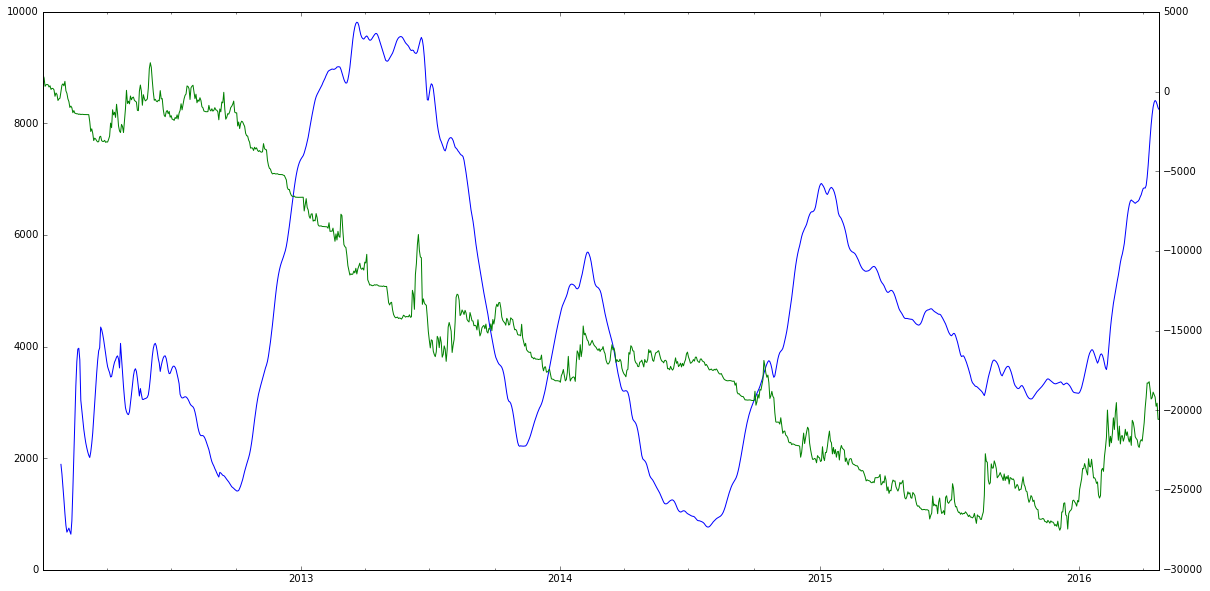

In [40]:
df.filter(like='width').mean(axis=1).plot()
df.close.plot(secondary_y=True)

In [8]:
figsize(20,10)
df.bb_lowerband.ix['2014':'2015'].plot()
df.bb_upperband.ix['2014':'2015'].plot()
df.close.ix['2014':'2015'].plot()
df.bb_central_line.ix['2014':'2015'].plot()


AttributeError: 'DataFrame' object has no attribute 'bb_lowerband'

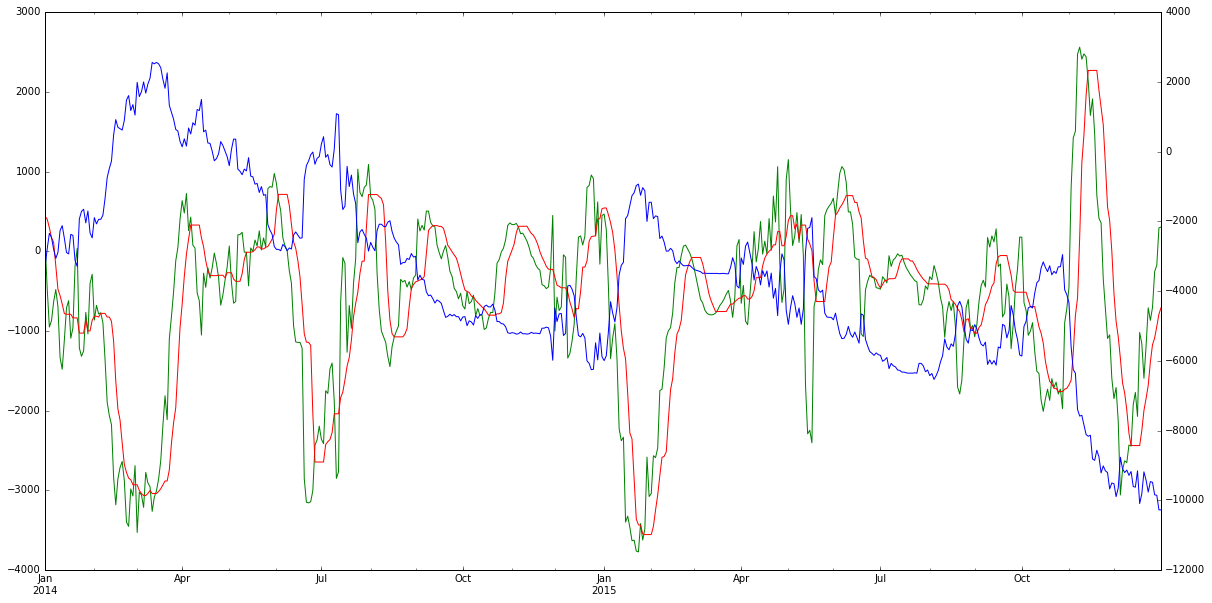

In [36]:

df.close.ix['2014':'2015'].plot(secondary_y=True)
(df.bb_lowerband -  df.close).ix['2014':'2015'].plot()

(df.bb_lowerband -  df.close).rolling(10).median().ix['2014':'2015'].plot()

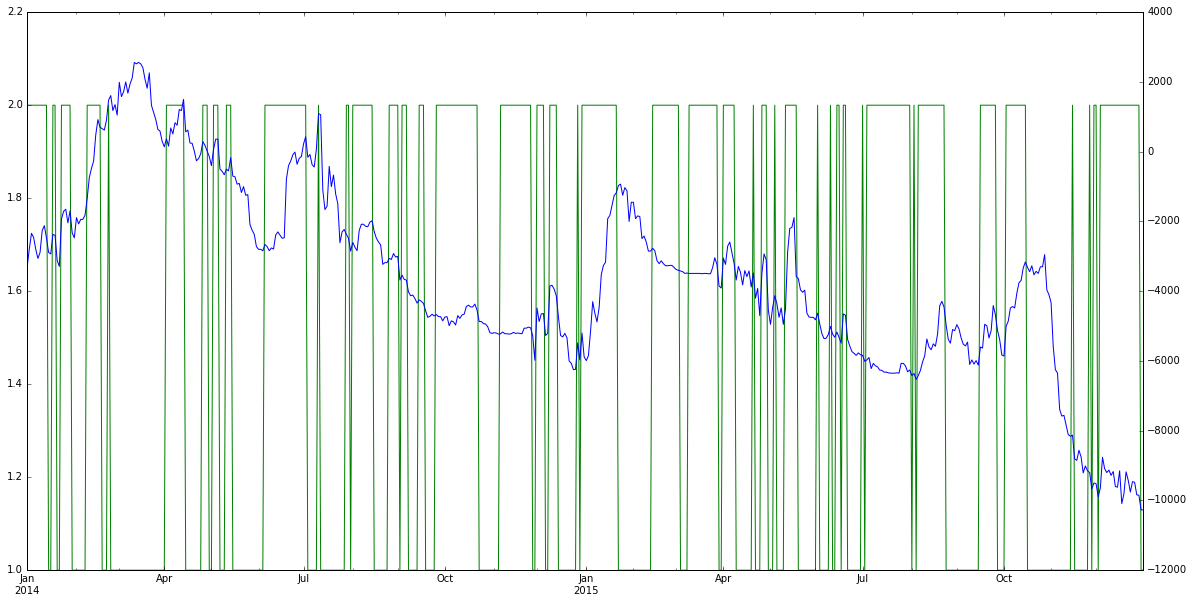

In [41]:
df.close.ix['2014':'2015'].plot(secondary_y=True)

#(df.close - df.bb_upperband).ix['2014':'2015'].plot()

#(df.close - df.bb_upperband).rolling(10).median().ix['2014':'2015'].plot()

((((df.close - df.bb_upperband).rolling(10).median()) <= (df.close - df.bb_upperband))+1).ix['2014':'2015'].plot()

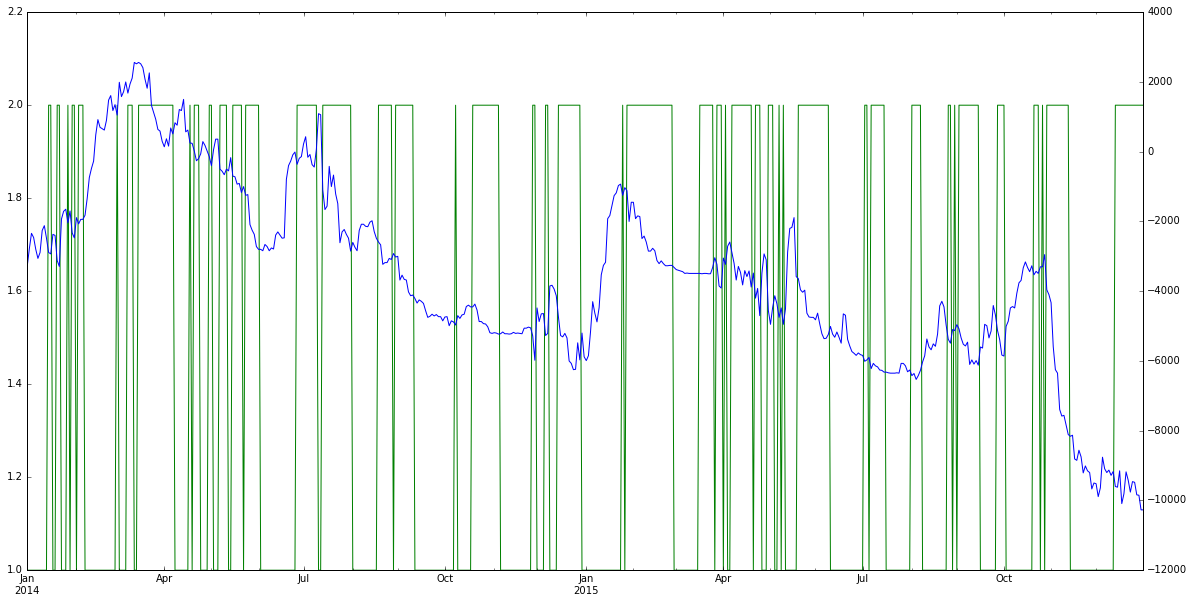

In [57]:
df.close.ix['2014':'2015'].plot(secondary_y=True)

#(df.close - df.bb_upperband).ix['2014':'2015'].plot()

#(df.close - df.bb_upperband).rolling(10).median().ix['2014':'2015'].plot()

(down_trend+1).ix['2014':'2015'].plot()

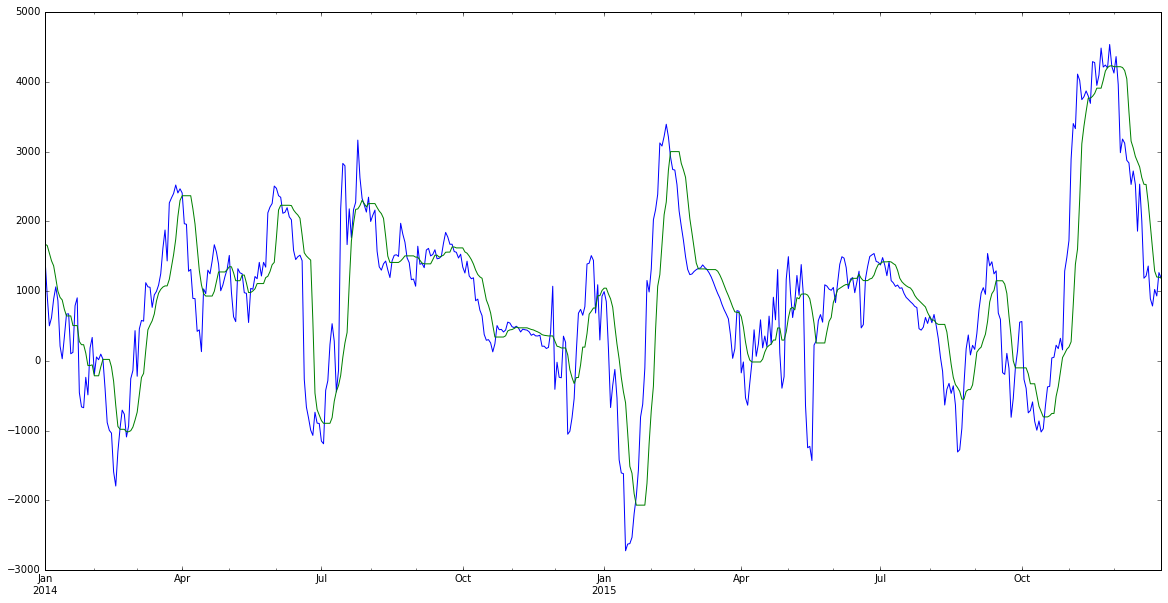

In [28]:
(df.bb_upperband -  df.close).ix['2014':'2015'].plot()

(df.bb_upperband -  df.close).rolling(10).median().ix['2014':'2015'].plot()

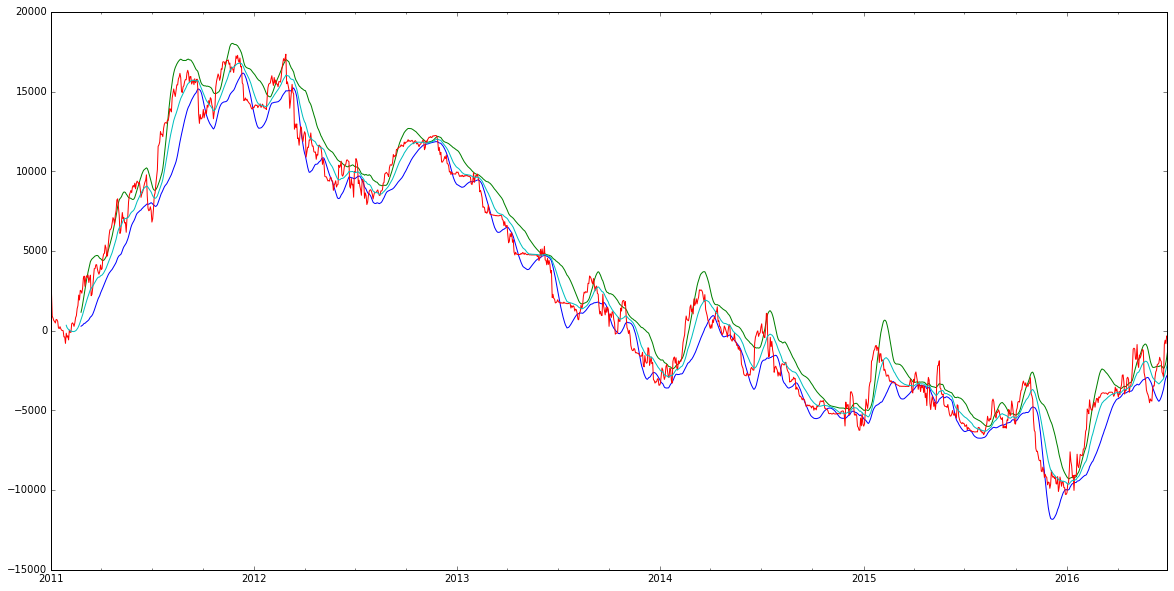

In [54]:
df.bb_lowerband.plot()
df.bb_upperband.plot()
df.close.plot()
df.bb_central_line.plot()

#df['bb_%b'].rank(pct=True).plot(secondary_y=True)

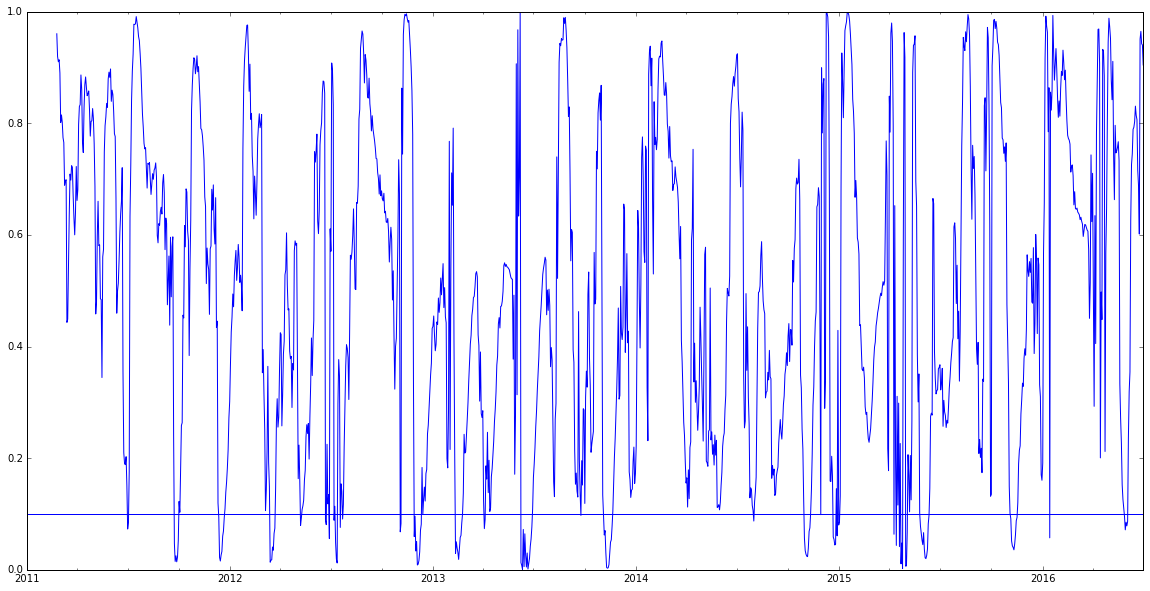

In [53]:
df['bb_%b'].rank(pct=True).plot()
axhline(y=0.1)

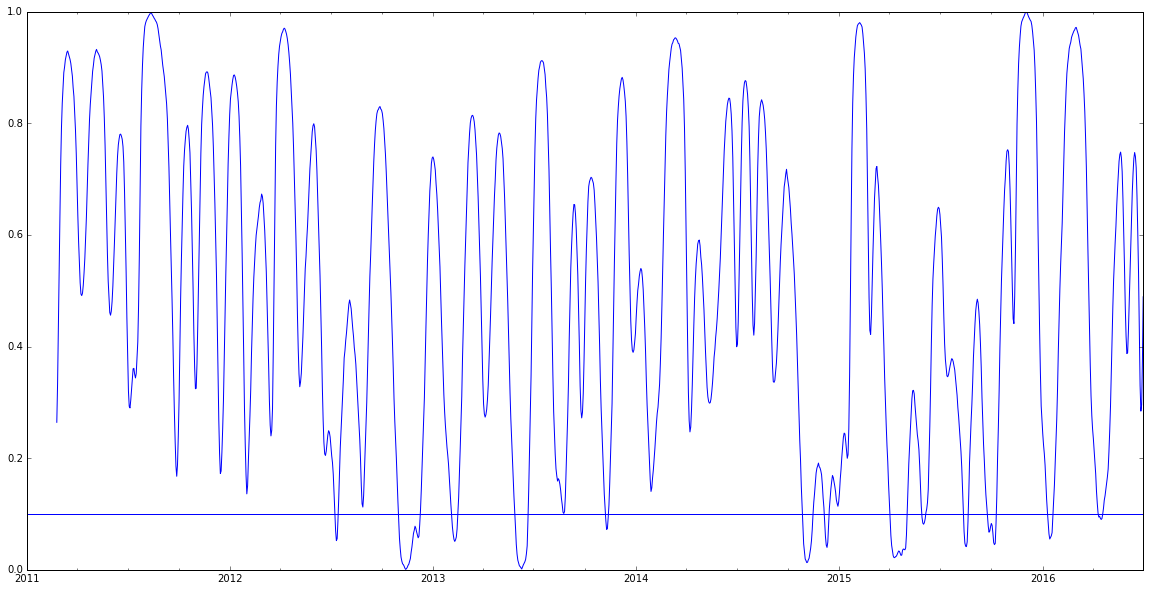

In [51]:
df.bb_width.rank(pct=True).plot()
axhline(y=0.1)

# Patterns

In [55]:
up_trend = (((df.close - df.bb_upperband).rolling(10).median()) <= (df.close - df.bb_upperband))

down_trend = (df.bb_lowerband -  df.close).rolling(10).median()  <= (df.bb_lowerband -  df.close)

In [ ]:
bb_width_pctrank_less_20 = df.bb_width.rank(pct=True) <= 0.2
bb_width_pctrank_less_10 = df.bb_width.rank(pct=True) <= 0.1

bb_width_pctrank_more_80 = df.bb_width.rank(pct=True) >= 0.8
bb_width_pctrank_more_90 = df.bb_width.rank(pct=True) <= 0.9

bb_width_pctrank_more_50 = df.bb_width.rank(pct=True) >= 0.5
bb_width_pctrank_less_50 = df.bb_width.rank(pct=True) <= 0.5

In [ ]:
bb_pctb_pctrank_less_20 = df['bb_%b'].rank(pct=True) <= 0.2
bb_pctb_pctrank_less_10 = df['bb_%b'].rank(pct=True) <= 0.1

bb_pctb_pctrank_more_80 = df['bb_%b'].rank(pct=True) >= 0.8
bb_pctb_pctrank_more_90 = df['bb_%b'].rank(pct=True) <= 0.9

bb_pctb_pctrank_more_50 = df['bb_%b'].rank(pct=True) >= 0.5
bb_pctb_pctrank_less_50 = df['bb_%b'].rank(pct=True) <= 0.5